## Version 2 Classification Steps

In version 2 of the classification process, the same steps were followed as in version 1 with one difference:

1. **Custom Model Architecture:** Instead of using the same custom model architecture as in version 1, a different architecture was employed to improve the classification performance. 

The remaining steps were the same as in version 1:

2. **Import Libraries:** The necessary libraries were imported to facilitate the implementation of the classification process.

3. **Exploratory Data Analysis:** An exploratory data analysis was conducted on both fake and original images to gain insight into the dataset's characteristics.

4. **Data Preparation:** The train, validation, and test datasets were prepared for training by resizing the images to 128x128x3.

5. **Model Training:** The data was trained using three different models - the updated custom model architecture, VGG16, and resnet50 - to identify the most appropriate model for the classification task.

# 1. Imports

In [1]:
import os
import numpy as np
import cv2
from PIL import Image
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf 
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras import layers, models
from tensorflow.keras.models import Sequential , Model, load_model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from tensorflow.keras.applications.resnet import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2
from keras import optimizers
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import log_loss, accuracy_score, confusion_matrix, classification_report

from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
# Check running on GPU

len(tf.config.experimental.list_physical_devices("GPU")) 

1

# 2. Exploratory Data Analysis

## 2.1. Number of Images

In [3]:
fake_path = 'data/fake/images/'
original_path = 'data/original/'

In [4]:
print('Number of fake images = {}'.format((len(os.listdir(fake_path))))) # the folder contains both fake image and its mask
print('Number of pristine images = {}'.format((len(os.listdir(original_path)))))

Number of fake images = 18194
Number of pristine images = 31783


## 2.2. Fake Images Shape

In [6]:
fakes = os.listdir(fake_path)

In [7]:
fake_shapes=[]

for fake in fakes:
    img = Image.open(fake_path+fake)
    img_array = np.array(img)
    fake_shapes.append(img_array.shape)

In [8]:
# random 20 sample of fake images shape 

for i in range(20):
    ind=np.random.randint(0, len(fake_shapes))
    print(str(ind) +'\t\t'+ str(fake_shapes[ind]) +'\t\t'+fakes[ind])

12858		(480, 640, 3)		2_000000538809.jpg
2567		(640, 480, 3)		0_000000239204.jpg
13762		(480, 640, 3)		3_000000273855.jpg
17711		(428, 640, 3)		8_000000297495.jpg
17406		(428, 640, 3)		7_000000462632.jpg
5441		(375, 500, 3)		0_000000504321.jpg
12117		(480, 640, 3)		2_000000342683.jpg
10179		(640, 640, 3)		1_000000487159.jpg
1579		(480, 640, 3)		0_000000144320.jpg
8311		(353, 640, 3)		1_000000150874.jpg
16592		(424, 640, 3)		6_000000127873.jpg
16217		(480, 640, 3)		5_000000423715.jpg
309		(428, 640, 3)		0_000000030303.jpg
13784		(427, 640, 3)		3_000000287804.jpg
15943		(375, 500, 3)		5_000000215872.jpg
5838		(480, 640, 3)		0_000000543389.jpg
8761		(428, 640, 3)		1_000000227307.jpg
12869		(333, 500, 3)		2_000000541463.jpg
16612		(425, 640, 3)		6_000000143576.jpg
7591		(480, 640, 3)		1_000000021622.jpg


In [9]:
heights=[]
widths=[]

for fake in fake_shapes:
    heights.append(fake[0])
    widths.append(fake[1])
    
print('minimum height = {}'.format(min(heights)))
print('maximum height = {}'.format(max(heights)))

print('minimum width = {}'.format(min(widths)))
print('maximum width = {}'.format(max(widths)))

minimum height = 135
maximum height = 640
minimum width = 125
maximum width = 640


## 2.3. Original Images Shape

In [10]:
originals = os.listdir(original_path)

In [11]:
original_shapes=[]

for original in originals:
    img = Image.open(original_path+original)
    img_array = np.array(img)
    original_shapes.append(img_array.shape)

In [12]:
# random 20 sample of original images shape 

for i in range(20):
    ind=np.random.randint(0, len(original_shapes))
    print(str(ind) +'\t\t'+ str(original_shapes[ind]) +'\t\t'+originals[ind])

16562		(484, 500, 3)		3708839890.jpg
7396		(332, 500, 3)		2622517932.jpg
11389		(500, 400, 3)		3126773489.jpg
16833		(500, 333, 3)		3742837127.jpg
19850		(333, 500, 3)		4445556418.jpg
17129		(500, 375, 3)		3808954787.jpg
8539		(177, 500, 3)		2768021570.jpg
11934		(375, 500, 3)		3189448227.jpg
3740		(333, 500, 3)		2154618839.jpg
27123		(500, 332, 3)		5504028572.jpg
30828		(459, 500, 3)		7842625076.jpg
16500		(500, 334, 3)		3701544312.jpg
15884		(333, 500, 3)		3630332976.jpg
23720		(500, 332, 3)		4810350090.jpg
5510		(333, 500, 3)		2396096161.jpg
29051		(375, 500, 3)		6760463415.jpg
20627		(333, 500, 3)		4535747403.jpg
8122		(500, 332, 3)		2714878018.jpg
8349		(500, 333, 3)		2746072388.jpg
25693		(500, 333, 3)		4967237527.jpg


In [13]:
heights=[]
widths=[]

for original in original_shapes:
    heights.append(original[0])
    widths.append(original[1])
    
print('minimum height = {}'.format(min(heights)))
print('maximum height = {}'.format(max(heights)))

print('minimum width = {}'.format(min(widths)))
print('maximum width = {}'.format(max(widths)))

minimum height = 112
maximum height = 500
minimum width = 164
maximum width = 500


After all data cleaning we have :

* 31783 original images (3 channels)
* 18194 fake images (3 channels)

# 3. Dataset Preparation

## 3.1. Concatenate Original And Fake Images

In [14]:
len(originals)

31783

In [15]:
len(fakes)

18194

In [16]:
image_names=[]

for i in range(0, len(originals)):
    image_names.append(originals[i])
for i in range(0, len(fakes)):
    image_names.append(fakes[i])

In [17]:
len(image_names)

49977

## 3.2. Train Test Split

In [18]:
labels=[0]*31783+[1]*18194

In [19]:
x_train, x, y_train, y = train_test_split(image_names, labels, test_size=0.2, stratify=labels)

In [20]:
x_test, x_valid, y_test, y_valid = train_test_split(x, y, test_size=0.5, stratify=y)

In [21]:
print("X train: ", len(x_train) ,", Y train: ", len(y_train))
print("X validation: ",len(x_valid) ,", Y validation: ", len(y_valid))
print("X test: ",len(x_test) ,", Y test: ", len(y_test))


X train:  39981 , Y train:  39981
X validation:  4998 , Y validation:  4998
X test:  4998 , Y test:  4998


## 3.3. Prepare Train Set

In [22]:
# read train images and resize it to be (128,128) so we can train the model on it 

dim=(128,128)

x_train_images=[]

for x in x_train:
    try:
        img=imread(original_path+x)
    except FileNotFoundError:
        img=imread(fake_path+x)
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    
    x_train_images.append(img)

In [23]:
heights=[]
widths=[]

for image in x_train_images:
    heights.append(image.shape[0])
    widths.append(image.shape[1])
    
print('minimum height = {}'.format(min(heights)))
print('maximum height = {}'.format(max(heights)))

print('minimum width = {}'.format(min(widths)))
print('maximum width = {}'.format(max(widths)))

minimum height = 128
maximum height = 128
minimum width = 128
maximum width = 128


In [24]:
x_train_fake_ind=[]

for ind, x in enumerate(x_train):
    if y_train[ind]==1:
        x_train_fake_ind.append(ind)


In [25]:
x_train_original_ind=[]

for ind, x in enumerate(x_train):
    if y_train[ind]==0:
        x_train_original_ind.append(ind)


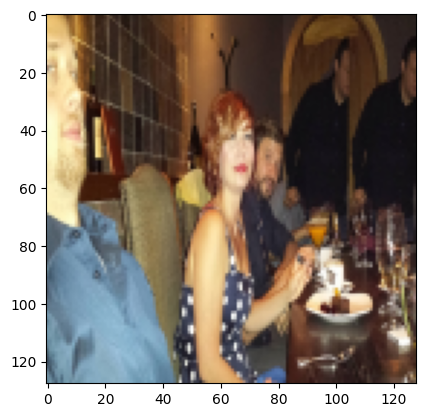

In [47]:
plt.imshow(x_train_images[x_train_fake_ind[0]][:,:,:])

## 3.4. Prepare Valid Set

In [28]:
x_valid_images=[]

for x in x_valid:
    try:
        img=imread(original_path+x)
    except FileNotFoundError:
        img=imread(fake_path+x)
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

    x_valid_images.append(img)

## 3.5. Prepare Test Set

In [29]:
x_test_images=[]

for x in x_test:
    try:
        img=imread(original_path+x)
    except FileNotFoundError:
        img=imread(fake_path+x)
    img = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

    x_test_images.append(img)

# 4. Image Data Generator

In [30]:
# convert the list of images to array of 4 dimensions  

x_train_images = np.stack(x_train_images)
x_valid_images = np.stack(x_valid_images)
x_test_images = np.stack(x_test_images)

In [31]:
print( "\nx_train_images shape is: " , x_train_images.shape)
print( "\nx_valid_images shape is: " , x_valid_images.shape)
print( "\nx_test_images shape is: " , x_test_images.shape)


x_train_images shape is:  (39981, 128, 128, 3)

x_valid_images shape is:  (4998, 128, 128, 3)

x_test_images shape is:  (4998, 128, 128, 3)


In [32]:
# Create an instance of ImageDataGenerator for data augmentation and preprocessing

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=False,
    fill_mode='reflect'
)

# Define the batch size

batch_size = 32

# Define the generator for the training data

train_generator = train_datagen.flow(
    x_train_images,  
    y_train,
    batch_size=batch_size,
    seed=42,
    shuffle=True,
)

# Define the generator for the validation data

valid_datagen = ImageDataGenerator(rescale=1./255)

valid_generator = valid_datagen.flow(
    x_valid_images,
    y_valid,  
    batch_size=batch_size,
    seed=42,
    shuffle=True,
)

In [33]:
len(train_generator)

1250

In [34]:
train_generator[0][0][0].shape

(128, 128, 3)

In [35]:
len(valid_generator)

157

In [36]:
valid_generator

# 5. Training Deep Learning Models

## 5.1. Custom Model

In [49]:
image_shape=(128,128,3)
custom_model = Sequential()

custom_model.add(Conv2D(32, (3, 3), activation='relu', input_shape=image_shape))
custom_model.add(MaxPooling2D(pool_size=(2, 2)))

custom_model.add(Conv2D(64, (3, 3), activation='relu'))
custom_model.add(MaxPooling2D(pool_size=(2, 2)))

custom_model.add(Conv2D(128, (3, 3), activation='relu'))
custom_model.add(MaxPooling2D(pool_size=(2, 2)))

custom_model.add(Conv2D(128, (3, 3), activation='relu'))
custom_model.add(MaxPooling2D(pool_size=(2, 2)))

custom_model.add(Flatten())

custom_model.add(Dense(512, activation='relu'))
custom_model.add(Dropout(0.5))

custom_model.add(Dropout(0.3))

custom_model.add(Dense(1, activation='sigmoid'))

custom_model.compile(loss='binary_crossentropy', 
                     optimizer='adam', 
                     metrics=['accuracy'])

In [50]:
custom_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 30, 30, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 128)      

In [51]:
# CallBack function to stop the training 
# if 10 epochs pass without increase val_acc

earlystop = EarlyStopping(monitor='val_accuracy', patience=10, mode='max')

In [52]:
custom_model_history = custom_model.fit_generator(train_generator,
                                     validation_data  = valid_generator, 
                                     epochs = 100, 
                                     steps_per_epoch=(len(train_generator)) ,
                                     validation_steps=(len(valid_generator)),
                                     callbacks=[earlystop])

Epoch 1/100
1250/1250 [==============================] - 329s 261ms/step - loss: 0.6354 - accuracy: 0.6431 - val_loss: 0.6220 - val_accuracy: 0.6587
Epoch 2/100
1250/1250 [==============================] - 121s 97ms/step - loss: 0.6227 - accuracy: 0.6580 - val_loss: 0.6128 - val_accuracy: 0.6735
Epoch 3/100
1250/1250 [==============================] - 123s 98ms/step - loss: 0.6164 - accuracy: 0.6648 - val_loss: 0.6088 - val_accuracy: 0.6701
Epoch 4/100
1250/1250 [==============================] - 124s 99ms/step - loss: 0.6116 - accuracy: 0.6708 - val_loss: 0.6040 - val_accuracy: 0.6769
Epoch 5/100
1250/1250 [==============================] - 122s 98ms/step - loss: 0.6070 - accuracy: 0.6759 - val_loss: 0.6096 - val_accuracy: 0.6769
Epoch 6/100
1250/1250 [==============================] - 124s 99ms/step - loss: 0.6013 - accuracy: 0.6832 - val_loss: 0.5939 - val_accuracy: 0.6875
Epoch 7/100
1250/1250 [==============================] - 125s 100ms/step - loss: 0.5963 - accuracy: 0.6850 - va

1250/1250 [==============================] - 119s 95ms/step - loss: 0.4947 - accuracy: 0.7633 - val_loss: 0.5786 - val_accuracy: 0.7281
Epoch 57/100
1250/1250 [==============================] - 118s 94ms/step - loss: 0.4930 - accuracy: 0.7636 - val_loss: 0.5770 - val_accuracy: 0.7385
Epoch 58/100
1250/1250 [==============================] - 118s 94ms/step - loss: 0.4946 - accuracy: 0.7646 - val_loss: 0.5582 - val_accuracy: 0.7431
Epoch 59/100
1250/1250 [==============================] - 117s 94ms/step - loss: 0.4927 - accuracy: 0.7654 - val_loss: 0.5181 - val_accuracy: 0.7449
Epoch 60/100
1250/1250 [==============================] - 117s 94ms/step - loss: 0.4934 - accuracy: 0.7644 - val_loss: 0.5944 - val_accuracy: 0.7237
Epoch 61/100
1250/1250 [==============================] - 118s 94ms/step - loss: 0.4908 - accuracy: 0.7670 - val_loss: 0.5099 - val_accuracy: 0.7627
Epoch 62/100
1250/1250 [==============================] - 118s 94ms/step - loss: 0.4872 - accuracy: 0.7677 - val_loss: 

## 5.2. Custome Model Evaluation

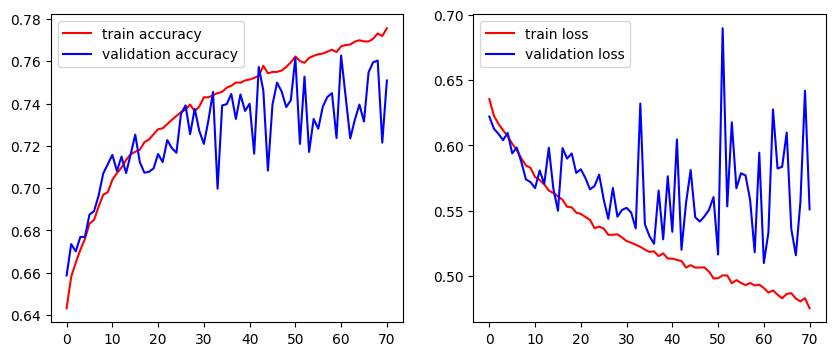

In [53]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
plt.plot(custom_model_history.history["accuracy"], label = "train accuracy", color = "red")
plt.plot(custom_model_history.history["val_accuracy"], label = "validation accuracy", color = "blue")
plt.legend()

plt.subplot(1,2,2)
plt.plot(custom_model_history.history["loss"], label = "train loss", color = "red")
plt.plot(custom_model_history.history["val_loss"], label = "validation loss", color = "blue")

plt.legend()
plt.show()

In [54]:
custom_model_predictions = custom_model.predict(x_test_images, verbose = 1,workers=-1)

157/157 [==============================] - 3s 8ms/step


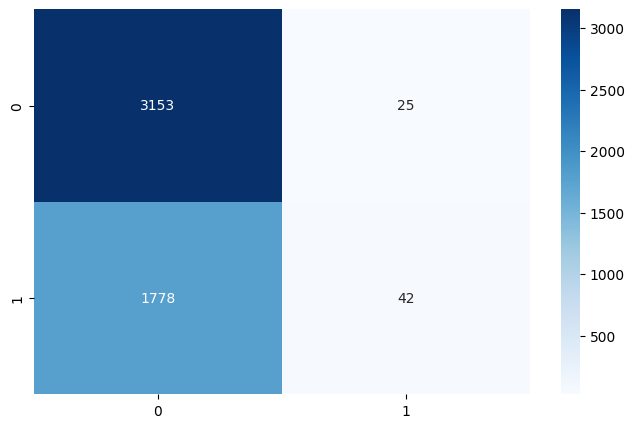

In [55]:
plt.figure(figsize = (8,5))
sns.heatmap(confusion_matrix(y_test, custom_model_predictions.round()), annot = True,fmt="d",cmap = "Blues")
plt.show()

In [56]:
print(classification_report(y_test,custom_model_predictions.round()))

              precision    recall  f1-score   support

           0       0.64      0.99      0.78      3178
           1       0.63      0.02      0.04      1820

    accuracy                           0.64      4998
   macro avg       0.63      0.51      0.41      4998
weighted avg       0.63      0.64      0.51      4998



In [57]:
custom_model.save('custom_model_V2.h5')

## 5.3. VGG16 Model

In [58]:
## Loading VGG16 model
base_model = VGG16(weights="imagenet", include_top=False, input_shape=image_shape)
base_model.trainable = False ## Not trainable weights

base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 128, 128, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 128, 128, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 64, 64, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 64, 64, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 64, 64, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 32, 32, 128)       0     

In [59]:
flatten_layer = layers.Flatten()
dense_layer_1 = layers.Dense(50, activation='relu')
dense_layer_2 = layers.Dense(20, activation='relu')
prediction_layer = layers.Dense(1, activation='sigmoid')

vgg_model = models.Sequential([
    base_model,
    flatten_layer,
    dense_layer_1,
    dense_layer_2,
    prediction_layer
])

vgg_model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

vgg_model.summary()

In [60]:
vgg_model_history = vgg_model.fit_generator(train_generator,
                                  validation_data  = valid_generator, 
                                  epochs = 100, 
                                  steps_per_epoch=(len(train_generator)) ,
                                  validation_steps=(len(valid_generator)),
                                  callbacks=[earlystop]
                             )

Epoch 1/100
1250/1250 [==============================] - 133s 102ms/step - loss: 0.5628 - accuracy: 0.7135 - val_loss: 0.5468 - val_accuracy: 0.7159
Epoch 2/100
1250/1250 [==============================] - 132s 105ms/step - loss: 0.5347 - accuracy: 0.7335 - val_loss: 0.5261 - val_accuracy: 0.7383
Epoch 3/100
1250/1250 [==============================] - 135s 108ms/step - loss: 0.5235 - accuracy: 0.7413 - val_loss: 0.5103 - val_accuracy: 0.7491
Epoch 4/100
1250/1250 [==============================] - 133s 107ms/step - loss: 0.5131 - accuracy: 0.7474 - val_loss: 0.5146 - val_accuracy: 0.7435
Epoch 5/100
1250/1250 [==============================] - 134s 107ms/step - loss: 0.5049 - accuracy: 0.7527 - val_loss: 0.5255 - val_accuracy: 0.7389
Epoch 6/100
1250/1250 [==============================] - 132s 106ms/step - loss: 0.4982 - accuracy: 0.7585 - val_loss: 0.5025 - val_accuracy: 0.7547
Epoch 7/100
1250/1250 [==============================] - 128s 102ms/step - loss: 0.4907 - accuracy: 0.7644

## 5.4. VGG16 Model Evaluation

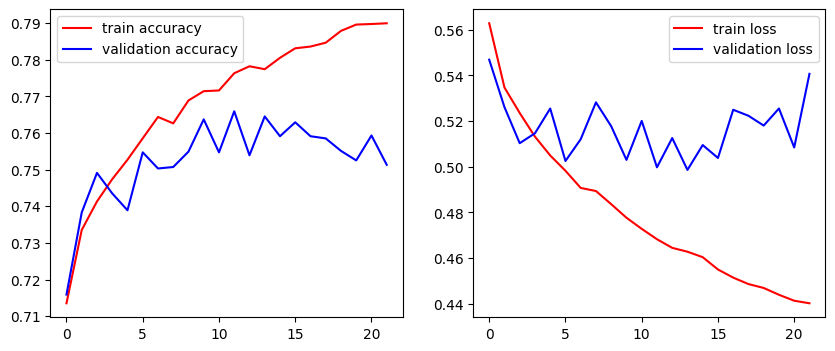

In [61]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
plt.plot(vgg_model_history.history["accuracy"], label = "train accuracy", color = "red")
plt.plot(vgg_model_history.history["val_accuracy"], label = "validation accuracy", color = "blue")
plt.legend()

plt.subplot(1,2,2)
plt.plot(vgg_model_history.history["loss"], label = "train loss", color = "red")
plt.plot(vgg_model_history.history["val_loss"], label = "validation loss", color = "blue")

plt.legend()
plt.show()

In [62]:
vgg_model_predictions = vgg_model.predict(x_test_images, verbose = 1,workers=-1)

157/157 [==============================] - 6s 37ms/step


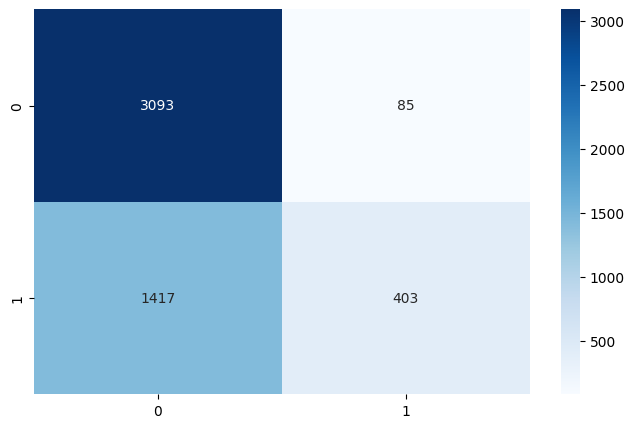

In [63]:
plt.figure(figsize = (8,5))
sns.heatmap(confusion_matrix(y_test, vgg_model_predictions.round()), annot = True,fmt="d",cmap = "Blues")
plt.show()

In [64]:
print(classification_report(y_test,vgg_model_predictions.round()))

              precision    recall  f1-score   support

           0       0.69      0.97      0.80      3178
           1       0.83      0.22      0.35      1820

    accuracy                           0.70      4998
   macro avg       0.76      0.60      0.58      4998
weighted avg       0.74      0.70      0.64      4998



In [65]:
vgg_model.save('vgg_model_V2.h5')

## 5.5. RasNet50 Model

In [11]:
# load RaseNet50
base_model=ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False 

base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 128, 128, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 134, 134, 3)  0           input_4[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 64, 64, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 64, 64, 64)   256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [3]:
 resnet_model=Sequential()
resnet_model.add(base_model)

top_model=Sequential()
top_model.add(Flatten())

top_model.add(Dense(64, activation='relu'))

top_model.add(Dense(1, activation='sigmoid'))

resnet_model.add(top_model)

resnet_model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

resnet_model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 4, 4, 2048)        23587712  
_________________________________________________________________
sequential_3 (Sequential)    (None, 1)                 2097281   
Total params: 25,684,993
Trainable params: 2,097,281
Non-trainable params: 23,587,712
_________________________________________________________________


In [67]:
resnet_model_history = resnet_model.fit_generator(train_generator,
                                      validation_data  = valid_generator, 
                                      epochs = 100, 
                                      steps_per_epoch=(len(train_generator)) ,
                                      validation_steps=(len(valid_generator)),
                                      callbacks=[earlystop])

Epoch 1/100
1250/1250 [==============================] - 137s 105ms/step - loss: 0.6703 - accuracy: 0.6322 - val_loss: 0.6386 - val_accuracy: 0.6299
Epoch 2/100
1250/1250 [==============================] - 128s 102ms/step - loss: 0.6241 - accuracy: 0.6556 - val_loss: 0.6089 - val_accuracy: 0.6767
Epoch 3/100
1250/1250 [==============================] - 126s 101ms/step - loss: 0.6189 - accuracy: 0.6619 - val_loss: 0.6245 - val_accuracy: 0.6425
Epoch 4/100
1250/1250 [==============================] - 128s 102ms/step - loss: 0.6165 - accuracy: 0.6643 - val_loss: 0.6027 - val_accuracy: 0.6779
Epoch 5/100
1250/1250 [==============================] - 132s 105ms/step - loss: 0.6156 - accuracy: 0.6656 - val_loss: 0.6038 - val_accuracy: 0.6763
Epoch 6/100
1250/1250 [==============================] - 130s 104ms/step - loss: 0.6123 - accuracy: 0.6704 - val_loss: 0.6008 - val_accuracy: 0.6821
Epoch 7/100
1250/1250 [==============================] - 127s 101ms/step - loss: 0.6113 - accuracy: 0.6693

## 5.6. RasNet50 Model Evaluation

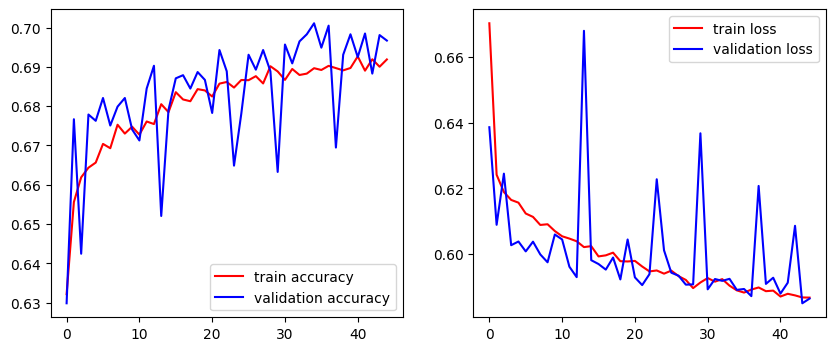

In [68]:
plt.figure(figsize = (10,4))
plt.subplot(1,2,1)
plt.plot(resnet_model_history.history["accuracy"], label = "train accuracy", color = "red")
plt.plot(resnet_model_history.history["val_accuracy"], label = "validation accuracy", color = "blue")
plt.legend()

plt.subplot(1,2,2)
plt.plot(resnet_model_history.history["loss"], label = "train loss", color = "red")
plt.plot(resnet_model_history.history["val_loss"], label = "validation loss", color = "blue")

plt.legend()
plt.show()

In [69]:
resnet_model_predictions = resnet_model.predict(x_test_images, verbose = 1,workers=-1)

157/157 [==============================] - 6s 30ms/step


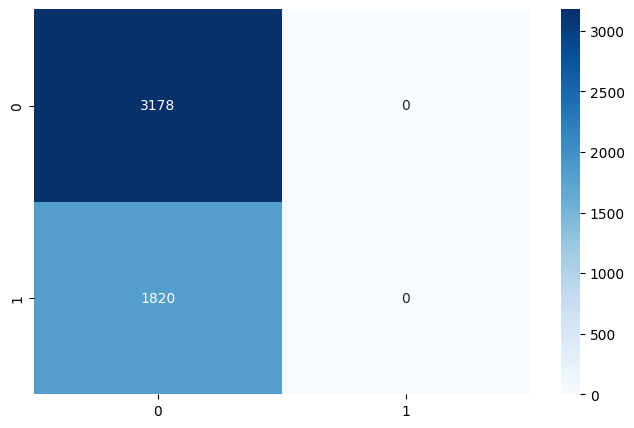

In [70]:
plt.figure(figsize = (8,5))
sns.heatmap(confusion_matrix(y_test, resnet_model_predictions.round()), annot = True,fmt="d",cmap = "Blues")
plt.show()

In [71]:
print(classification_report(y_test,resnet_model_predictions.round()))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78      3178
           1       0.00      0.00      0.00      1820

    accuracy                           0.64      4998
   macro avg       0.32      0.50      0.39      4998
weighted avg       0.40      0.64      0.49      4998



In [72]:
resnet_model.save('resnet_model_V2.h5')